# Part A

In [869]:
# 10 - 02 - 2026

#Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [870]:
# Step 2: Load Dataset
df = pd.read_csv(r"air-quality-index-regression-analysis\city_day.csv")
df.head()


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [871]:
#Step 3: Basic Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [872]:
# Step4: Compute Summary Statistics
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [873]:
# Step 5: Select Relevant Columns
df = df[['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3', 'AQI']]
df.head()


,PM2.5,PM10,NO2,SO2,CO,O3,AQI
0,NaN,NaN,18.22,27.64,0.92,133.36,NaN
1,NaN,NaN,15.69,24.55,0.97,34.06,NaN
2,NaN,NaN,19.30,29.07,17.40,30.70,NaN
3,NaN,NaN,18.48,18.59,1.70,36.08,NaN
4,NaN,NaN,21.42,39.33,22.10,39.31,NaN


In [874]:
# check missiong values
df.isnull().sum()

# if missing values exist
df = df.dropna()
df.isnull().sum()

PM2.5    0
PM10     0
NO2      0
SO2      0
CO       0
O3       0
AQI      0
dtype: int64

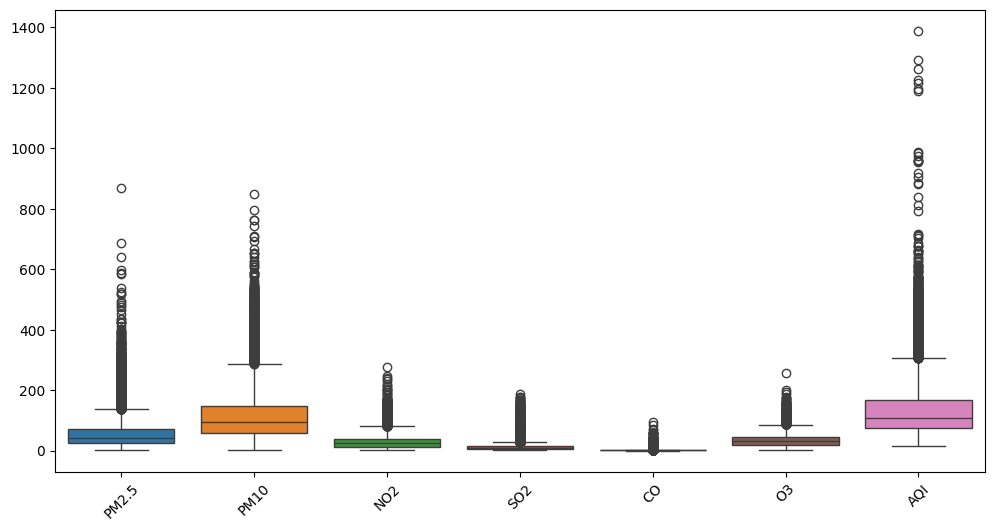

In [875]:
# check outliers by boxplot
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()


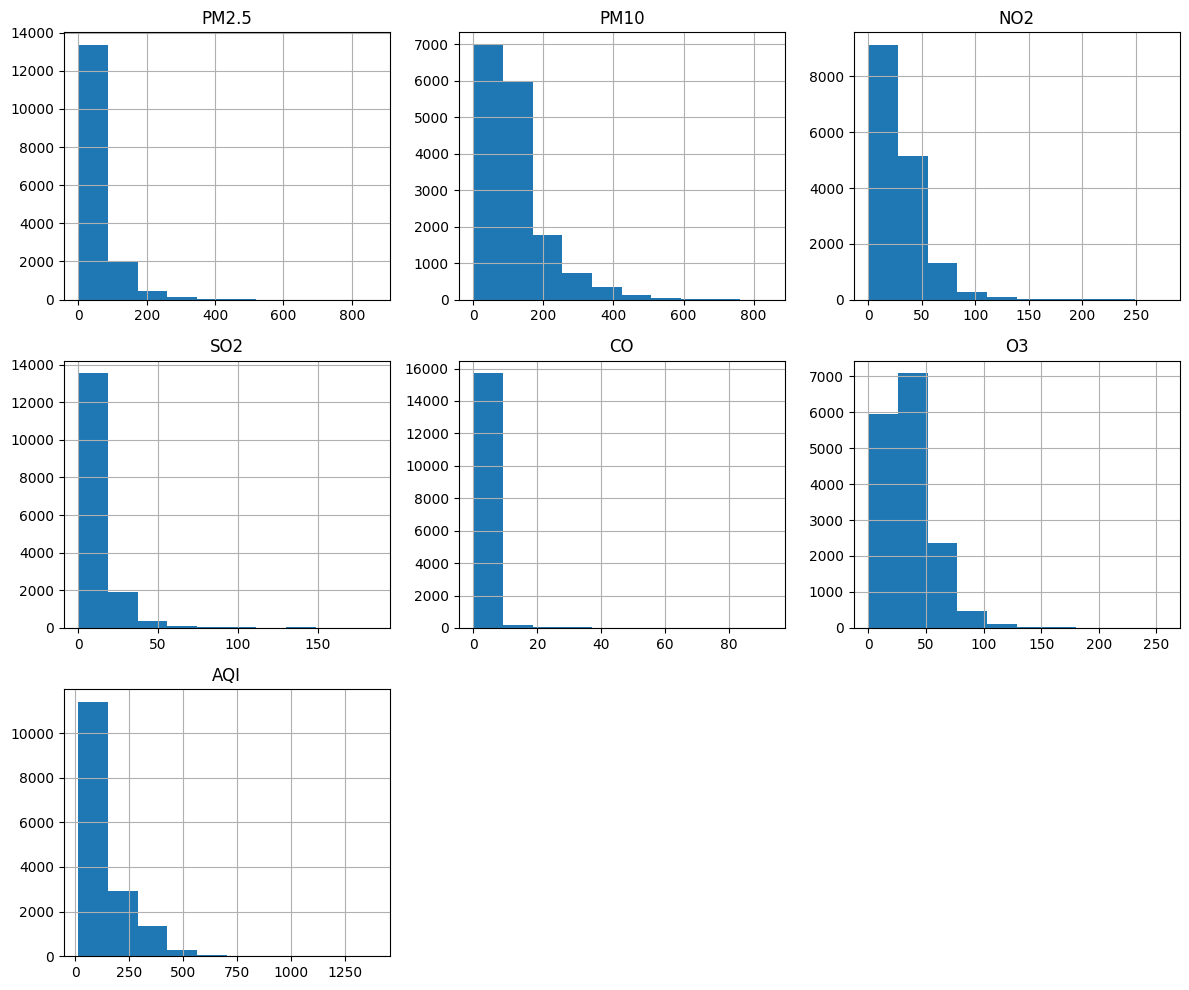

In [876]:
# Plot Feature Distributions
df.hist(figsize=(12,10))
plt.tight_layout()
plt.show()

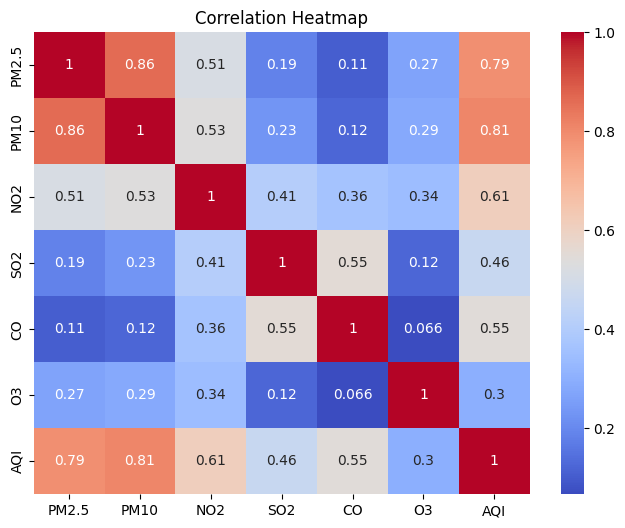

In [877]:
# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


# Part B

In [878]:
# Manual Simple Linear Regression + Graph 

import numpy as np
import matplotlib.pyplot as plt



In [879]:
# Extract data
x = df['PM2.5'].to_numpy()
y = df['AQI'].to_numpy()

In [880]:
# Calculate means
x_mean = np.mean(x)
y_mean = np.mean(y)

# Calculate slope (m)
m = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean) ** 2)

# Calculate intercept (c)
c = y_mean - m * x_mean

print("Slope (m):", m)
print("Intercept (c):", c)

Slope (m): 1.580900069921964
Intercept (c): 50.70234415843039


In [881]:
# Predictions
y_pred = m * x + c

# Calculate R²
ss_total = np.sum((y - y_mean) ** 2)
ss_residual = np.sum((y - y_pred) ** 2)
r2 = 1 - (ss_residual / ss_total)

print("R² Score:", r2)

R² Score: 0.6232234535971313


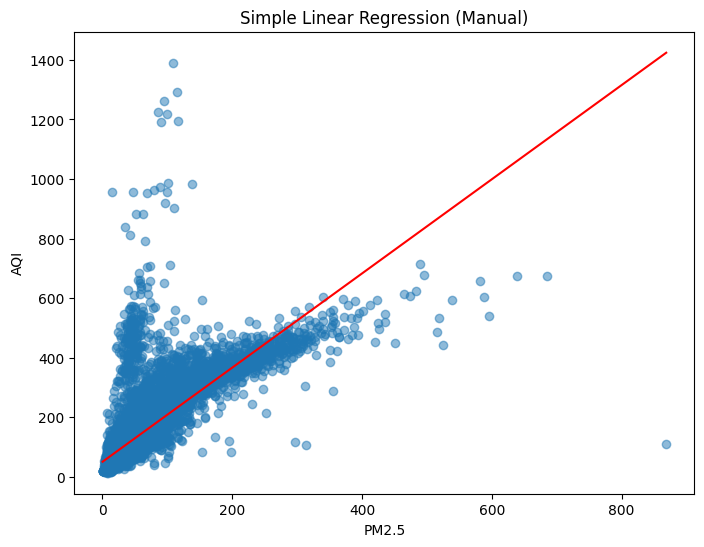

In [882]:
# Plot graph
x_sorted = np.sort(x)
y_line = m * x_sorted + c

plt.figure(figsize=(8,6))
plt.scatter(x, y, alpha=0.5)
plt.plot(x_sorted, y_line, color='red')
plt.xlabel("PM2.5")
plt.ylabel("AQI")
plt.title("Simple Linear Regression (Manual)")
plt.show()

# Part C

In [883]:
# Step 1: Select features and target
features = ['PM2.5','PM10','NO2','SO2','CO','O3']
target = 'AQI'

In [884]:
# Step 2: Create X and y
X = df_clean[features].to_numpy()   # shape (n,6)
y = df_clean[target].to_numpy()     # shape (n,)

In [885]:
# Remove missing values
df_clean = df[features + [target]].dropna()

# Step 3: Add column of 1s for intercept
ones = np.ones((X.shape[0], 1))
X = np.hstack((ones, X))   # shape becomes (n,7)

# Step 4: Apply Normal Equation
beta = np.linalg.inv(X.T @ X) @ X.T @ y

In [886]:
# Step 5: Print coefficients
print("Intercept (b0):", beta[0])

for i, col in enumerate(features):
    print(f"Coefficient for {col}:", beta[i+1])

# Step 6: Make predictions
y_pred = X @ beta

# Step 7: Calculate R² manually
ss_total = np.sum((y - np.mean(y))**2)
ss_residual = np.sum((y - y_pred)**2)

r2 = 1 - (ss_residual / ss_total)

print("\nR² Score:", r2)

Intercept (b0): 9.946870880771899
Coefficient for PM2.5: 0.7172911666887081
Coefficient for PM10: 0.48643474400257547
Coefficient for NO2: 0.08178821578517566
Coefficient for SO2: 0.442217638980259
Coefficient for CO: 12.282423446856003
Coefficient for O3: 0.2096504901206786

R² Score: 0.8944291256989431


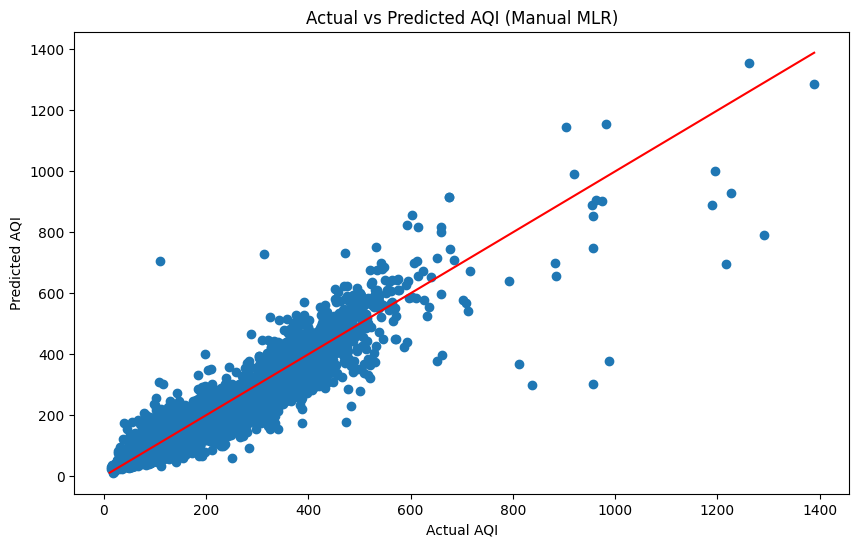

In [898]:
# Step 8: Plot Actual vs Predicted
plt.figure(figsize=(10,6))
plt.scatter(y, y_pred)

# Ideal reference line (y = x)
min_val = min(y.min(), y_pred.min())
max_val = max(y.max(), y_pred.max())

plt.plot([min_val, max_val], [min_val, max_val], color='red')

plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Actual vs Predicted AQI (Manual MLR)")
plt.show()


# Part D

In [888]:
# PART D: Polynomial Regression
# Step 1: Import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [889]:
# Step 2: Create Polynomial Features (Degree = 2)
poly = PolynomialFeatures(degree=2, include_bias=False)

X_poly = poly.fit_transform(X)

In [890]:
# Step 3: Train-Test Split (Polynomial Data)
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(
    X_poly, y, test_size=0.2, random_state=42
)


In [891]:
# Step 4: Train Polynomial Regression Model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train_poly)

LinearRegression()

In [892]:
# Step 5: Predictions
y_pred_poly = poly_model.predict(X_test_poly)

In [893]:
# Step 6: Evaluate Model
mse_poly = mean_squared_error(y_test_poly, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test_poly, y_pred_poly)

print("Polynomial MSE:", mse_poly)
print("Polynomial RMSE:", rmse_poly)
print("Polynomial R2:", r2_poly)


Polynomial MSE: 946.1011777562546
Polynomial RMSE: 30.758757740784244
Polynomial R2: 0.9130793025457892


In [894]:
# Step 7: Compare Linear vs Polynomial
print("Linear Regression:")
print("R²  :", r2)
print("RMSE:", rmse)

print("\nPolynomial Regression (Degree 2):")
print("R²  :", r2_poly)
print("RMSE:", rmse_poly)



Linear Regression:
R²  : 0.8944291256989431
RMSE: 33.10005899399734

Polynomial Regression (Degree 2):
R²  : 0.9130793025457892
RMSE: 30.758757740784244


In [895]:
# PART E: Regularization
# Step 1: Apply Ridge Regression
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)   # alpha = regularization strength
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)

r2_ridge = r2_score(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

print("Ridge Regression")
print("R2:", r2_ridge)
print("RMSE:", rmse_ridge)


Ridge Regression
R2: 0.8993431822593912
RMSE: 33.10006056071696


In [896]:
# Step 2: Apply Lasso Regression
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

y_pred_lasso = lasso.predict(X_test)

r2_lasso = r2_score(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

print("\nLasso Regression")
print("R2:", r2_lasso)
print("RMSE:", rmse_lasso)



Lasso Regression
R2: 0.8993425241845959
RMSE: 33.10016876143532


In [ ]:
# Step 3: Compare Coefficients
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Linear": mlr.coef_,
    "Ridge": ridge.coef_,
    "Lasso": lasso.coef_
})

coefficients

In [ ]:
# PART F: Model Diagnostics
# Step 1: Calculate Residuals
residuals = y_test - y_pred

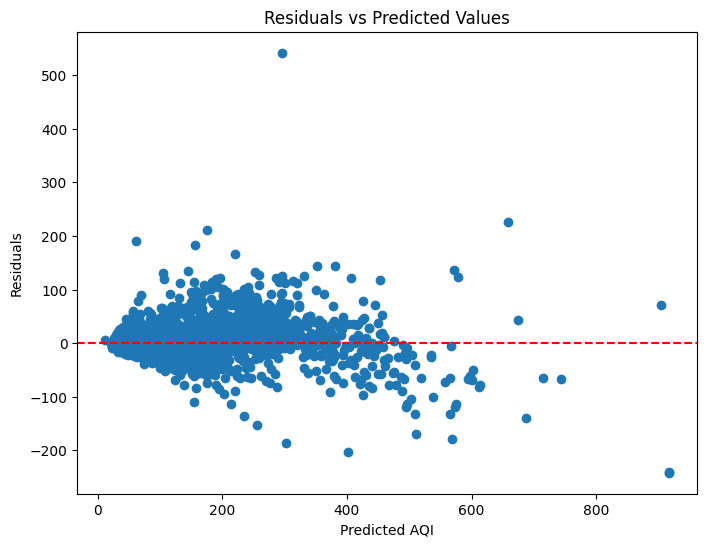

In [ ]:
# Step 2: Plot Residuals vs Predicted Values
plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted AQI")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()

## Validation of Regression Assumptions

To ensure the reliability of the regression model, the fundamental assumptions of linear regression were evaluated using residual analysis.

### Linearity

The residuals vs predicted values plot shows a random scatter of points around zero. There is no clear curve or systematic pattern observed. This indicates that the relationship between the independent variables and AQI is reasonably linear.

### Independence of Errors

The dataset consists of daily air quality measurements. While minor temporal dependency may exist, for the purpose of this regression analysis, the errors are assumed to be independent.

### Homoscedasticity

The spread of residuals appears relatively constant across different predicted AQI values. There is no clear funnel-shaped pattern, suggesting that the assumption of constant variance (homoscedasticity) is satisfied.

### Normality of Residuals

The distribution of residuals appears approximately bell-shaped when plotted using a histogram. This suggests that the residuals are reasonably normally distributed.

Conclusion

Based on residual analysis and diagnostic plots, the major regression assumptions are reasonably satisfied. Therefore, the regression model can be considered valid for predicting AQI using the selected pollutant features.

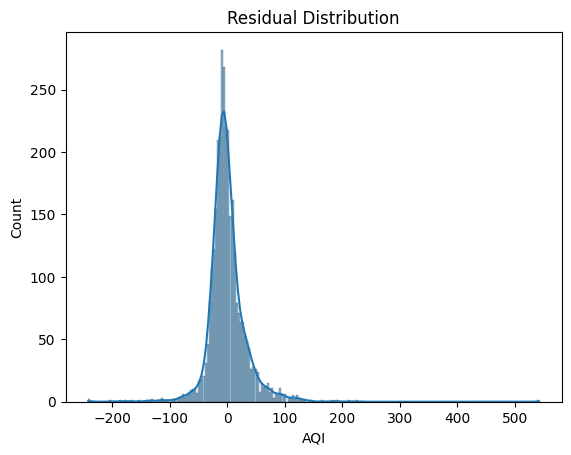

In [ ]:
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()